# Hyperparameter Search


### A busca de hiperparâmetros é um passo crítico no processo de desenvolvimento de modelos de aprendizado de máquina. Hiperparâmetros são parâmetros que não são aprendidos diretamente durante o treinamento, mas são definidos a priori. Eles influenciam o comportamento do algoritmo de treinamento e, consequentemente, a performance do modelo resultante.

### Exemplos comuns de hiperparâmetros:
### - incluem a taxa de aprendizado para otimizadores,
### - o número de camadas em redes neurais,
### - tamanho dos lotes utilizados durante o treinamento.

### Dada a vastidão do espaço de hiperparâmetros, técnicas sistemáticas de busca são empregadas para encontrar configurações ótimas.

# Tipos de busca de hiperparâmetros

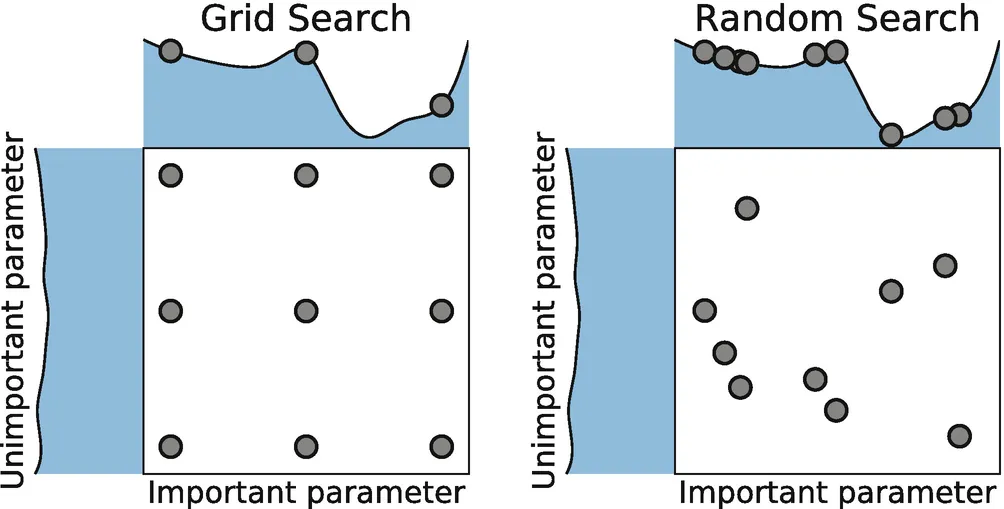

- Grid search tende a ser uma busca exaustiva mas pode pode não encontrar o valor ótimo. Aceitável quando existem poucos hiperparâmetros

- Random Search, em geral, consegue melhores resultados porém algumas vezes precisa de um tempo não trivial para isso.

- Algumas pesquisas recentes indicam que, em termos gerais, a busca aleatória tem resultados melhores https://dl.acm.org/doi/10.5555/2503308.2188395


# Código da árvore de decisão

['Adelie' 'Chinstrap' 'Gentoo']
Accuracy: 0.9701492537313433


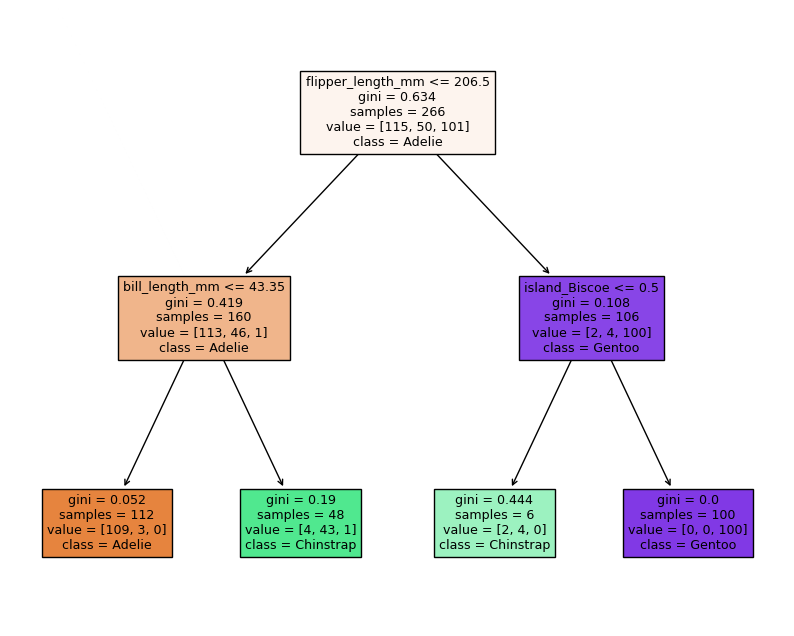

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

df = pd.read_csv('penguim.csv')
df = df.dropna(axis=0)
df = df.drop(labels=['rowid', 'year'], axis=1)

# Choose: Dummies or OneHotEncoding
X = pd.get_dummies(df.drop('species', axis=1), columns=['island', 'sex'])
y = df.species
y = df['species']
# Careful not to do label encoding before train_test_split!

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the target as values
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test) # Avoids contamination
print(label_encoder.classes_)

# Create the decision tree model and fit it to the training data
# WARNING: Talk about this max_depth value later!
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)

# Evaluate the model on the testing data
# accuracy_score? others?
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(10, 8))

class_names = label_encoder.classes_
plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

# Cross-Validation

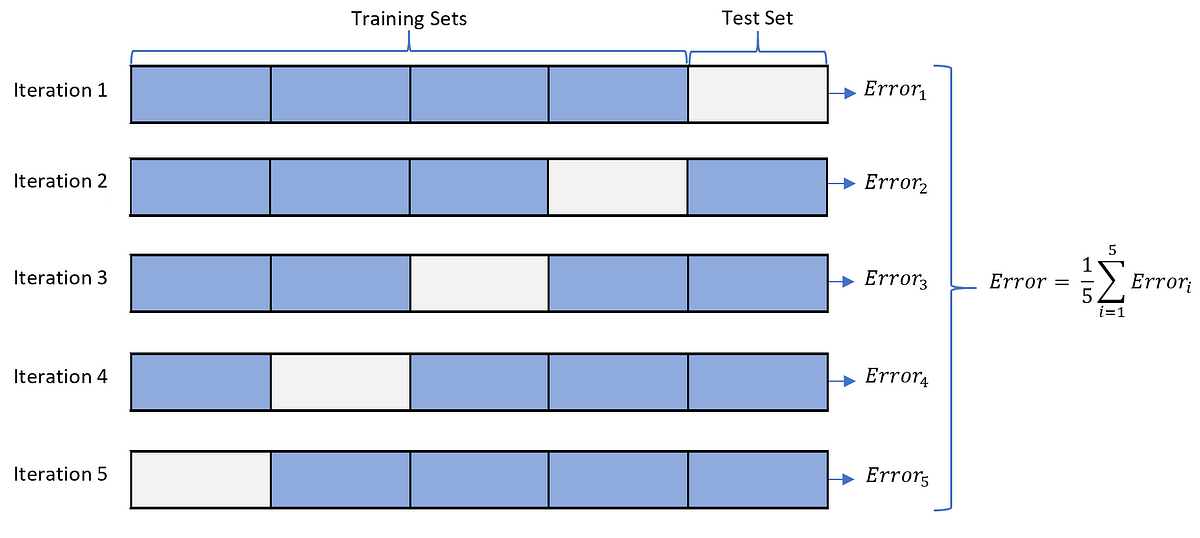

## Vamos melhorar um pouco o código utilizando GridSearch

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
params = {
    'max_depth': [1, 2, 3, 4]
}

# Use GridSearchCV to search over the hyperparameters
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Parameter 'cv': Determines the cross-validation splitting strategy.
grid_search = GridSearchCV(dt, params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Create a dataframe from the cv_results_ attribute
results_df = pd.DataFrame(grid_search.cv_results_)

# Select only the columns that you're interested in
# cols_to_keep = ['param_max_depth', 'mean_test_score', 'std_test_score']
cols_to_keep = results_df.columns
results_df = results_df[cols_to_keep]

# Sort the dataframe by mean_test_score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Print the dataframe
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.002523,0.000018,0.001600,0.000049,4,{'max_depth': 4},0.955056,0.955056,0.977273,0.962462,0.010473,1
2,0.002800,0.000238,0.001695,0.000015,3,{'max_depth': 3},0.932584,0.943820,0.977273,0.951226,0.018981,2
1,0.003033,0.000239,0.001865,0.000090,2,{'max_depth': 2},0.943820,0.943820,0.943182,0.943607,0.000301,3
0,0.006411,0.003568,0.002286,0.000273,1,{'max_depth': 1},0.808989,0.786517,0.806818,0.800775,0.010121,4


## Outros parâmetros

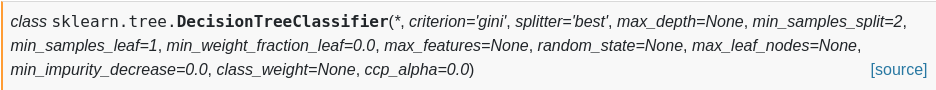

In [ ]:

# Get the best hyperparameters and fit the model with them
best_params = grid_search.best_params_
print(best_params)
dt = DecisionTreeClassifier(**best_params, random_state=42)
dt.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

{'max_depth': 4}
Accuracy: 1.0


# Alternativas?

## sklearn.model_selection.RandomizedSearchCV
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

## Auto-sklearn
https://automl.github.io/auto-sklearn/master/

In [ ]:
# Código de exemplo dos autores do auto-sklearn
# Código executa por uma hora...
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

if __name__ == "__main__":
    X, y = sklearn.datasets.load_digits(return_X_y=True)
    X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1)
    automl = autosklearn.classification.AutoSklearnClassifier()
    automl.fit(X_train, y_train)
    y_hat = automl.predict(X_test)
    print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))